# The process of making the graphs for Both tweets

Further graphs creation for Mr. Donald Trump and Mr. Joe Biden

Try to concatenate the two data sets (Trump and Biden) and create more graphs to visualise the data

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dfT = pd.read_csv("Trump(processed).csv")
dfB = pd.read_csv("Biden(processed).csv")

In [26]:
#add a column to specify this is from Trump
dfT.insert(2, "name", "Trump")

In [27]:
#add a column to specify this is from Biden
dfB.insert(2, "name", "Biden")

In [28]:
#delete the id column
dfT.drop('id', axis=1, inplace=True)
dfB.drop('id', axis=1, inplace=True)

In [29]:
#delete the date column
dfT.drop('date', axis=1, inplace=True)
dfB.drop('date', axis=1, inplace=True)

In [74]:
#drop all the rows which contain NaN value
dfT.dropna()

# Combine the two data set (Trump and Biden)

In [31]:
#concatenate the two data set
frames = [dfT, dfB]
result = pd.concat(frames)
result

,type,name,tweet,comments,retweets,likes
0,fake,Trump,“REPORT: DOMINION DELETED 2.7 MILLION TRUMP VO...,17300000.0,24700000.0,61900000.0
1,fake,Trump,.@FoxNews daytime ratings have completely coll...,9000000.0,8600000.0,34800000.0
2,fake,Trump,"“OK, I’ve seen enough. What’s going to happen ...",3600000.0,8000000.0,31800000.0
3,fake,Trump,Nobody wants to report that Pennsylvania and M...,8900000.0,1600000.0,41000000.0
4,fact,Trump,I am pleased to announce that I have given my ...,4100000.0,7100000.0,35800000.0
...,...,...,...,...,...,...
27,fact,Biden,We are going to be the first Democrats to win ...,6300.0,25000.0,341100.0
28,fact,Biden,What is becoming clearer each hour is that rec...,5100.0,18900.0,224500.0
29,fact,Biden,The numbers tell us a clear and convincing sto...,22100.0,57500.0,841800.0
30,fact,Biden,"Keep the faith, folks.",29100.0,70200.0,977100.0


# Compare the numbers of tweets they posted

Numbers of fact and numbers of fake news

In [62]:
# count the numbers of type (column) for each account
Type_count_series = result.groupby([result["name"], result["type"]]).size()

In [63]:
# output a list which shows the frequencies of Fake news or Fact
for Type in Type_count_series.index:
    print(Type, Type_count_series[Type], sep=', total:')

('Biden', 'fact'), total:32
('Trump', 'fact'), total:24
('Trump', 'fake'), total:27


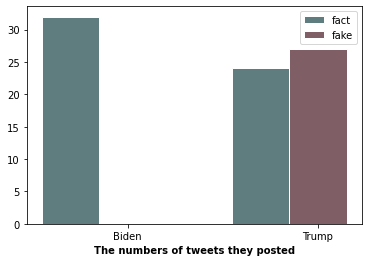

In [73]:
# plot a grouped bar chart for the numbers of fake news and fact they posted

# set width of bar
barWidth = 0.30
 
# set height of bar
fact = [32, 24]
fake = [0, 27]
 
# Set position of bar on X axis
f1 = np.arange(len(fact))
f2 = [x + barWidth for x in r1]

# set the bar color
plt.bar(f1, fact, color='#5f7c7f', width=barWidth, edgecolor='white', label='fact')
plt.bar(f2, fake, color='#7f5f65', width=barWidth, edgecolor='white', label='fake')

# Add xticks on the middle of the group bars
plt.xlabel('The numbers of tweets they posted', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(fact))], ['Biden', 'Trump'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Stacked bar chart and Grouped bar chart for Retweets

In [32]:
#group the retweets by name and type
grouped_Retweets= result[["retweets"]].groupby(
    [result["name"], result["type"]])

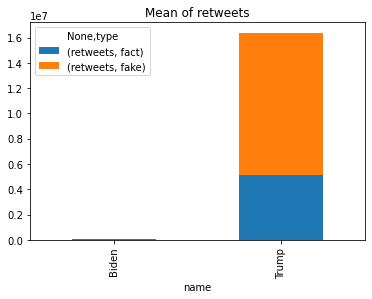

In [33]:
#plot the stacked bar chart
grouped_Retweets.mean().unstack().plot.bar(title='Mean of retweets', stacked=True)

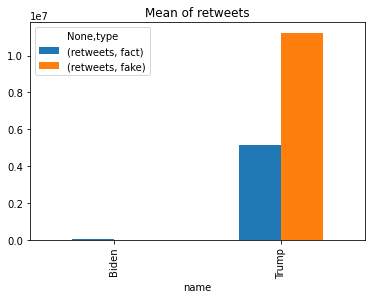

In [34]:
#plot the grouped bar chart
grouped_Retweets.mean().unstack().plot.bar(title='Mean of retweets')

# Stacked bar chart and Grouped bar chart for Comments

In [35]:
#group the comments by name and type
grouped_Comments= result[["comments"]].groupby(
    [result["name"], result["type"]])

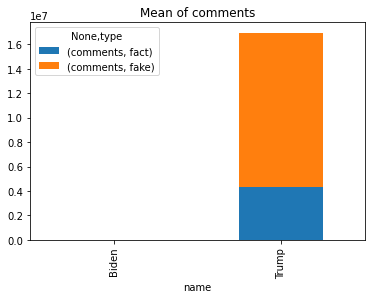

In [36]:
#plot the stacked bar chart
grouped_Comments.mean().unstack().plot.bar(title='Mean of comments', stacked=True)

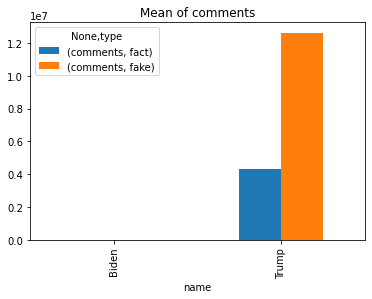

In [37]:
#plot the grouped bar chart
grouped_Comments.mean().unstack().plot.bar(title='Mean of comments')

# Stacked bar chart and Grouped bar chart for Likes

In [38]:
#group the likes by name and type
grouped_Likes= result[["likes"]].groupby(
    [result["name"], result["type"]])

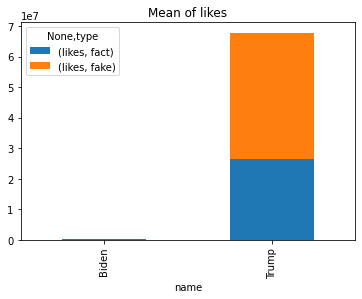

In [39]:
#plot the stacked bar chart
grouped_Likes.mean().unstack().plot.bar(title='Mean of likes', stacked=True)

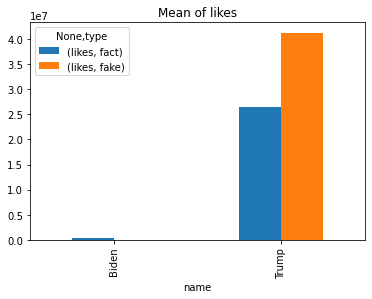

In [40]:
#plot the grouped bar chart
grouped_Likes.mean().unstack().plot.bar(title='Mean of likes')

# Normal distribution curve for Trump's and Biden's tweets

Number of Retweets, Comments, Likes

In [41]:
dfT["T_retweets_log"] = np.log(dfT["retweets"] + 1)
dfT["T_likes_log"] = np.log(dfT["likes"] + 1)
dfT["T_comments_log"] = np.log(dfT["comments"] + 1)

dfB["B_retweets_log"] = np.log(dfB["retweets"] + 1)
dfB["B_likes_log"] = np.log(dfB["likes"] + 1)
dfB["B_comments_log"] = np.log(dfB["comments"] + 1)

In [42]:
#calculate the standard score
dfT["T_retweets_log_z"] = (dfT["T_retweets_log"] -dfT["T_retweets_log"].mean()) / dfT["T_retweets_log"].std()
dfT["T_likes_log_z"] = (dfT["T_likes_log"] -dfT["T_likes_log"].mean()) / dfT["T_likes_log"].std()
dfT["T_comments_log_z"] = (dfT["T_comments_log"] -dfT["T_comments_log"].mean()) / dfT["T_comments_log"].std()

dfB["B_retweets_log_z"] = (dfB["B_retweets_log"] -dfB["B_retweets_log"].mean()) / dfB["B_retweets_log"].std()
dfB["B_likes_log_z"] = (dfB["B_likes_log"] -dfB["B_likes_log"].mean()) / dfB["B_likes_log"].std()
dfB["B_comments_log_z"] = (dfB["B_comments_log"] -dfB["B_comments_log"].mean()) / dfB["B_comments_log"].std()

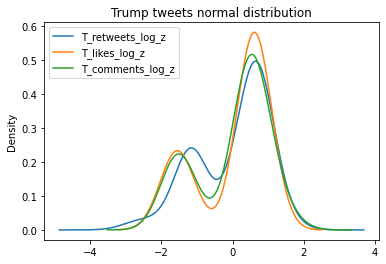

In [43]:
#plot the normal distribution curve of Trump Tweets
dfT.plot.kde(y=["T_retweets_log_z", "T_likes_log_z", "T_comments_log_z"], title="Trump tweets normal distribution")

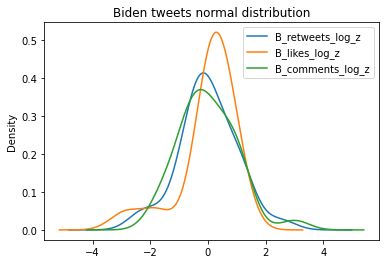

In [44]:
#plot the normal distribution curve of Biden Tweets
dfB.plot.kde(y=["B_retweets_log_z", "B_likes_log_z", "B_comments_log_z"], title="Biden tweets normal distribution")